In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

pandas: Digunakan untuk membaca dan memanipulasi dataset.
numpy: Untuk perhitungan numerik.
KMeans: Algoritme clustering dari pustaka scikit-learn.
StandardScaler: Untuk menormalisasi fitur data.
matplotlib.pyplot: Untuk visualisasi data.
silhouette_score: Mengukur seberapa baik data dikelompokkan berdasarkan hasil clustering.

In [3]:
df = pd.read_csv('diabetes.csv')

Dataset diabetes.csv dimuat ke dalam variabel df dalam bentuk DataFrame. Dataset ini berisi data tentang pasien yang terkait dengan diabetes.

In [6]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_replace:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

Kolom tertentu mengandung nilai 0 yang tidak realistis untuk beberapa fitur (seperti Glucose atau BMI).
Loop ini menggantikan nilai 0 di setiap kolom dengan median dari kolom tersebut, sehingga mengurangi pengaruh data yang tidak valid.

In [8]:
scaler = StandardScaler()
features = df.drop(columns=['Outcome']) 
features_scaled = scaler.fit_transform(features)


StandardScaler digunakan untuk menstandarisasi fitur (nilai rata-rata = 0, standar deviasi = 1).
Kolom Outcome dihapus karena itu adalah label dan tidak boleh memengaruhi proses clustering.
Data yang sudah diskalakan disimpan dalam features_scaled.

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

WCSS adalah total jarak kuadrat antara setiap titik data dengan centroidnya dalam cluster.
Untuk setiap nilai kk dari 1 hingga 10, algoritme K-Means dijalankan, dan nilai WCSS dicatat.

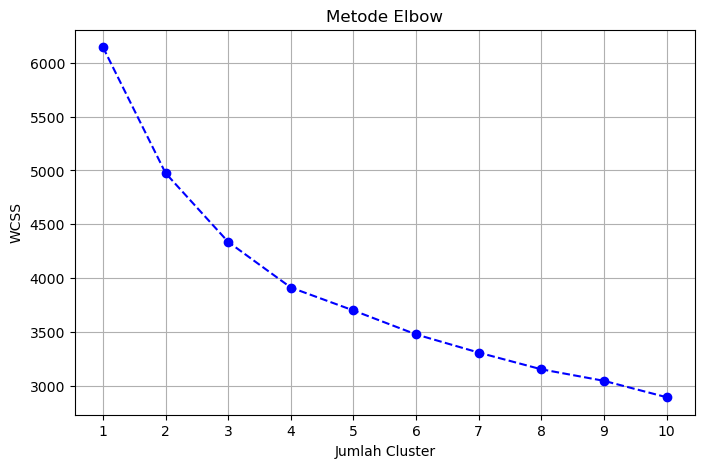

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

Grafik Elbow digunakan untuk menentukan jumlah cluster optimal.
Titik di mana penurunan WCSS mulai melambat disebut sebagai elbow point, yang menunjukkan jumlah cluster optimal.

In [11]:
optimal_clusters = 3

Dari grafik Elbow, dipilih k=3k=3 sebagai jumlah cluster optimal.

In [12]:
kmeans_model = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans_model.fit_predict(features_scaled)

Model K-Means dibuat dengan k=3k=3 cluster.
Data dikelompokkan ke dalam cluster, dan hasilnya disimpan dalam variabel clusters.

In [13]:
df['Cluster'] = clusters

Kolom baru bernama Cluster ditambahkan ke DataFrame df untuk menyimpan hasil pengelompokan.

In [14]:
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Coefficient: {silhouette_avg:.2f}")

Silhouette Coefficient: 0.20


Silhouette Coefficient adalah metrik evaluasi untuk clustering, yang nilainya berkisar dari -1 hingga 1.
Nilai mendekati 1 menunjukkan bahwa data dikelompokkan dengan baik.

In [15]:
cluster_counts = df['Cluster'].value_counts()
print("\nJumlah data per cluster:")
print(cluster_counts)


Jumlah data per cluster:
Cluster
2    344
1    254
0    170
Name: count, dtype: int64


Jumlah data di setiap cluster dihitung menggunakan fungsi value_counts.

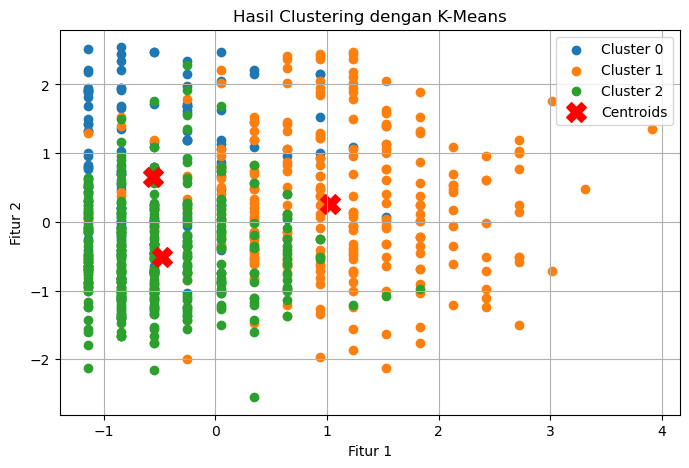

In [16]:
plt.figure(figsize=(8, 5))
for cluster in range(optimal_clusters):
    plt.scatter(
        features_scaled[clusters == cluster, 0], 
        features_scaled[clusters == cluster, 1], 
        label=f'Cluster {cluster}'
    )
plt.scatter(
    kmeans_model.cluster_centers_[:, 0], 
    kmeans_model.cluster_centers_[:, 1], 
    s=200, c='red', label='Centroids', marker='X'
)
plt.title('Hasil Clustering dengan K-Means')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend()
plt.grid()
plt.show()

Data hasil clustering divisualisasikan dalam grafik scatter.
Centroid ditampilkan dengan simbol X berwarna merah untuk membedakan dengan data lainnya.